# Ultrafast package usage
---
## Setting-up

In [1]:
from ultrafast.experiment import Experiment
from ultrafast.utils.divers import get_root_directory, read_data
import os

In [2]:
path = os.path.join(
	get_root_directory(),
	'examples', 'data', 'denoised_2.csv')

---
## Data loading
To load an experiment, there are two possibilities, you can either enter the path to your `csv` data:

In [3]:
experiment = Experiment.load_data(path, wave_is_row=True)
experiment.x.shape, experiment.data.shape, experiment.wavelength.shape

((1000,), (1000, 301), (301,))

or you can supply the `time`, `data` and `wave` arrays using:

In [4]:
time, data, wave = read_data(path, wave_is_row= True)
experiment = Experiment(time, data, wave)
time.shape, data.shape, wave.shape

((1000,), (1000, 301), (301,))

---
## Data exploration
The first thing to do is to explore the data set loaded

To explore the spectral dimension use the `plot_spectra` method
By default all spectra will be plotted 
(Except if there are more than 250 which is the case here)

1520.0
style applied


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Wavelength (nm)', ylabel='$\\Delta$A'>)

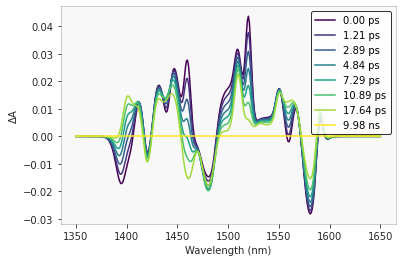

In [13]:
experiment.plot_spectra('auto', style='light')

From the figure we observe 8 spectra which are equally spaced at 1520 nm.

To plot a different number of traces automatically use the following format:
`times=['auto', 6, 1480]` for six spectra equally spaced at 1480 nm

1480.0
style applied


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Wavelength (nm)', ylabel='$\\Delta$A'>)

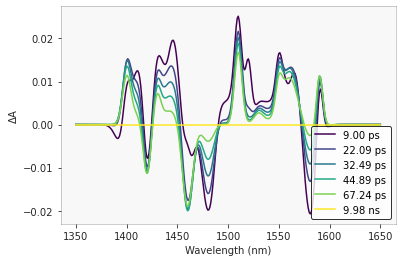

In [9]:
# TODO: change the name of the 'times' argument
experiment.plot_spectra(times=['auto', 6, 1480], style='light')

style applied


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Time (ps)', ylabel='$\\Delta$A'>)

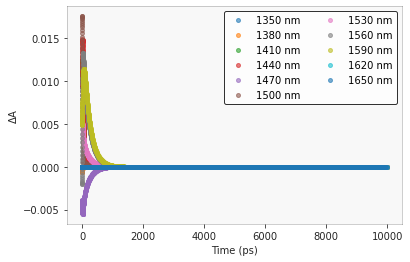

In [18]:
# To explore the time dimension use the `plot_traces` method.
# This function plots the selected traces by default. 
# If `traces` is set to `'auto'`, 10 equally spaced traces 
# (in spectrum dimensions) are displayed
experiment.plot_traces(traces='auto', style='light')
# TODO: remove the "style applied", figure size, etc messages

In [ ]:
# alternatively we can pass a list of traces value (according to wavelength vector)
experiment.plot_traces([1408,1520,1578])

# To explore the number of components is possible to use the singular value decomposition (SVD)
# The SVD reveal that the data set is compose by three components
experiment.plotSVD(1, True)

# After selecting the SV this can be plot again with "plot_traces" function
experiment.plot_traces()

# The original traces can be selected again with "select_traces" method
experiment.select_traces(points='all')

# To perform a global fit normally is not perform over the complete data set
# but over a selection of traces. Selecting traces is easy with "select_traces"
# function. To select a series of traces indicate the separation value.
# The selected traces will be separated 10 points in the wave vector
experiment.select_traces(points=10, average=0)

# UNITS
# -----
# Experiment automatically handles unit of figures via two attributes
# Modifying the units automatically modify figures axis and legends
# time_unit by default "ps"
# wavelength_unit by default "nm"
experiment.time_unit 
# >>> 'ps'
experiment.time_unit = 'us'
experiment.time_unit 
# >>> 'μs'
experiment.time_unit = 'millisecond'
experiment.time_unit 
# >>> 'ms'

experiment.wave_unit 
# >>> 'nm'
experiment.wave_unit = 'wavenumber'
experiment.wave_unit 
# >>> 'cm-1'
experiment.wave_unit = 'nanometer'
experiment.wave_unit 
# >>> 'nm'
experiment.wave_unit = 'cm'
experiment.wave_unit 
# >>> 'cm-1'

# DATA FITTING
# ------------
# The first step to perform a fitting is to initialize the model and the parameters.
# For a classical exponential fitting use "initial_exp_params" function.
# the first parameters to indicate is t0 and fwhm which indicates if the exponential
# fit is modified with a gaussian function. For this data set t0 = 0, and fwhm = None
# Since we dont have the signal raising. Then the initial guess for the fit are given.
# The SVD reveled that 3 component where needed, and values are given after plotting 
# several traces.
#                               (t0, fwhm, t1, t2, t3)
experiment.initialize_exp_params(0, None, 4, 60, 500)

# now we are ready to fit the data with "final_fit" method, this will previously
# run a prefit 
experiment.global_fit()

# RESULTS EXPLORING
# -----------------
# For any fit the first thing is to print the results which can be done with the
# "print_results" method (If none fit number is passed the last performed fit
# will be consider)
experiment.print_results()

# >>> Fit number 1: 	Global Exponential fit
# >>> -------------------------------------------------
# >>> Results:	Parameter		Initial value	Final value		Vary
# >>>			time 0:   		0.0000   		0.0000   		False
# >>>			tau 1:   		4.0000   		8.0000   		True
# >>>			tau 2:   		60.0000   		30.0000   		True
# >>>			tau 3:   		500.0000   		200.0000   		True
# >>> Details:
# >>> 		Number of traces: 30; average: 0
# >>> 		Fit with 3 exponential; Deconvolution False
# >>> 		Tau inf: None
# >>> 		Number of iterations: 994
# >>> 		Number of parameters optimized: 240
# >>> 		Weights: False

# The following step is plot the fit and residual plot which is done with the 
# "plot_fit" method
experiment.plot_fit()

# finally the Decay Associated Spectra (DAS) can be plotted with the plot_DAS method
experiment.plot_DAS()



In [ ]:
path = os.path.join(
	get_root_directory(),
	'examples', 'data', 'denoised_2.csv')

experiment = Experiment.load_data(path, wave_is_row=True)

# alternatively experiment can be instantiated as follows

# from ultrafast.utils.divers import read_data, select_traces
# time, data, wave = read_data(path, wave_is_row= True)
# experiment = Experiment(time, data, wave)

# DATA EXPLORATION
# ----------------
# The first thing to do is explore the data set loaded

# To explore the spectral dimension use "plot_spectra" method
# By default all spectra will be plotted 
# (Except if there are more than 250 which is the case here)
experiment.plot_spectra('auto')

# You might need to run plt.show() from here

# From the figure we observe that 8 spectra equally spaced
# at 1520 nm are displayed.

# To plot plot a different number of traces automatically use the following format
# ['auto', 6, 1480] six spectra plotted equally spced at 1480
experiment.plot_spectra(times=['auto', 6, 1480])

# To explore the time dimension use "plot_traces" method
# This function plots by default the selected traces except 
# If traces is set to 'auto' 10 traces separated equally in spectra dimension
# are display
experiment.plot_traces()

# alternatively we can pass a list of traces value (according to wave vector)
experiment.plot_traces([1408,1520,1578])

# To explore the number of components is possible to use the singular value decomposition (SVD)
# The SVD reveal that the data set is compose by three components
experiment.plotSVD(1, True)

# After selecting the SV this can be plot again with "plot_traces" function
experiment.plot_traces()

# The original traces can be selected again with "select_traces" method
experiment.select_traces(points='all')

# To perform a global fit normally is not perform over the complete data set
# but over a selection of traces. Selecting traces is easy with "select_traces"
# function. To select a series of traces indicate the separation value.
# The selected traces will be separated 10 points in the wave vector
experiment.select_traces(points=10, average=0)

# UNITS
# -----
# Experiment automatically handles unit of figures via two attributes
# Modifying the units automatically modify figures axis and legends
# time_unit by default "ps"
# wavelength_unit by default "nm"
experiment.time_unit 
# >>> 'ps'
experiment.time_unit = 'us'
experiment.time_unit 
# >>> 'μs'
experiment.time_unit = 'millisecond'
experiment.time_unit 
# >>> 'ms'

experiment.wave_unit 
# >>> 'nm'
experiment.wave_unit = 'wavenumber'
experiment.wave_unit 
# >>> 'cm-1'
experiment.wave_unit = 'nanometer'
experiment.wave_unit 
# >>> 'nm'
experiment.wave_unit = 'cm'
experiment.wave_unit 
# >>> 'cm-1'

# DATA FITTING
# ------------
# The first step to perform a fitting is to initialize the model and the parameters.
# For a classical exponential fitting use "initial_exp_params" function.
# the first parameters to indicate is t0 and fwhm which indicates if the exponential
# fit is modified with a gaussian function. For this data set t0 = 0, and fwhm = None
# Since we dont have the signal raising. Then the initial guess for the fit are given.
# The SVD reveled that 3 component where needed, and values are given after plotting 
# several traces.
#                               (t0, fwhm, t1, t2, t3)
experiment.initialize_exp_params(0, None, 4, 60, 500)

# now we are ready to fit the data with "final_fit" method, this will previously
# run a prefit 
experiment.global_fit()

# RESULTS EXPLORING
# -----------------
# For any fit the first thing is to print the results which can be done with the
# "print_results" method (If none fit number is passed the last performed fit
# will be consider)
experiment.print_results()

# >>> Fit number 1: 	Global Exponential fit
# >>> -------------------------------------------------
# >>> Results:	Parameter		Initial value	Final value		Vary
# >>>			time 0:   		0.0000   		0.0000   		False
# >>>			tau 1:   		4.0000   		8.0000   		True
# >>>			tau 2:   		60.0000   		30.0000   		True
# >>>			tau 3:   		500.0000   		200.0000   		True
# >>> Details:
# >>> 		Number of traces: 30; average: 0
# >>> 		Fit with 3 exponential; Deconvolution False
# >>> 		Tau inf: None
# >>> 		Number of iterations: 994
# >>> 		Number of parameters optimized: 240
# >>> 		Weights: False

# The following step is plot the fit and residual plot which is done with the 
# "plot_fit" method
experiment.plot_fit()

# finally the Decay Associated Spectra (DAS) can be plotted with the plot_DAS method
experiment.plot_DAS()

